In [69]:
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tqdm import tqdm

In [22]:
data, meta = tfds.load('deep_weeds',
                       as_supervised=True,
                       with_info=True)

In [76]:
raw_train = data['train']

In [47]:
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.rgb_to_grayscale(image)
    image = (image[...,0]/255)
    return image, label

In [70]:
labels = meta.features['label'].names
labels

['Chinee apple',
 'Lantana',
 'Parkinsonia',
 'Parthenium',
 'Prickly acacia',
 'Rubber vine',
 'Siam weed',
 'Snake weed',
 'Negative']

In [68]:
train = raw_train.map(format_example)

samples = 10000
X = np.zeros((samples,256,256))
y = np.zeros(samples)
i = 0
for image, label in tqdm(train.take(samples)):
    X[i] = image.numpy()
    y[i] = int(label)
    i += 1

100%|██████████| 10000/10000 [00:18<00:00, 527.94it/s]


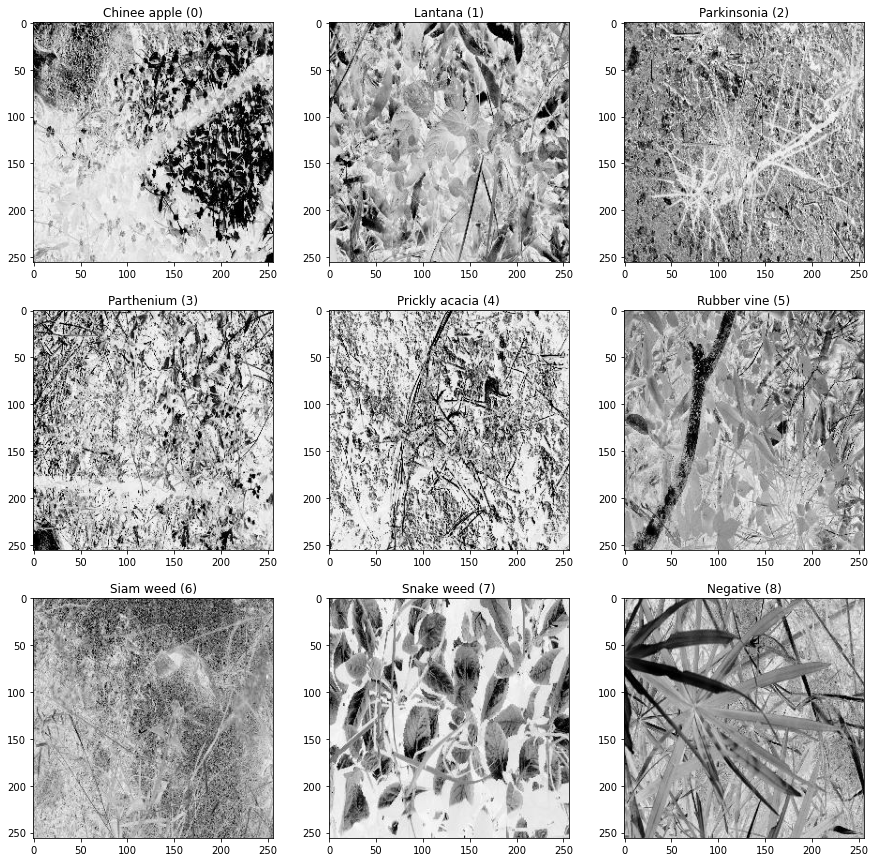

In [75]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    ax[0, i].imshow(X[y == i][0], cmap=plt.cm.gray_r)
    ax[0, i].set_title('{} ({})'.format(labels[i],i))
    ax[1, i].imshow(X[y == i+3][0], cmap=plt.cm.gray_r)
    ax[1, i].set_title('{} ({})'.format(labels[i+3],i+3))
    ax[2, i].imshow(X[y == i+6][0], cmap=plt.cm.gray_r)
    ax[2, i].set_title('{} ({})'.format(labels[i+6],i+6))
plt.show()

In [77]:
for i in range(samples):
    pd.DataFrame(X[i]).to_csv("./deep_weeds_csv_raw/weed"+ str(i) + ".csv")

NameError: name 'y_subset' is not defined

In [78]:
pd.DataFrame(y).to_csv("./deep_weeds_csv_raw/weed_y.csv")